## Project for CMSC/STAT 118 - Fall Quarter 2019 (due November 12)##

This is not a group project. You may discuss the project with other students but you should code and write the report independently. You should acknowledge any help in writing. The score will be based on:
-  clarity an soundness of the arguments and conclusions; 
-  use of data to back up arguments and analysis quality;  
-  insightfulness of the results;
-  quality of the data vizualization, summaries used, and overall presentation.

The project is inspired by the current Fall Data Challenge from the American Statistical Association. You can find information about it here:
https://thisisstatistics.org/falldatachallenge/

The goal of the ASA Data challenge is to use "statistical and data visualization skills [...] to help find ways to reduce and resolve the homelessness crisis, using HUD’s 2018 Point-in-Time Estimates of Homelessness in the U.S. dataset":

https://www.hudexchange.info/resource/5783/2018-ahar-part-1-pit-estimates-of-homelessness-in-the-us/

The goal of this project is gain insight on homelessness using the tools you have learned so far in this class.

### The Data ###

You can use any data you can find to answer the questions below (note that the website for the ASA challenge contains links to various datasets), but you need to specify the provenance of the data in your report. 

One interesting question is on the city-level homelessness estimates, and we will begin by using data corresponding to "Continuums of Care" (CoC), which are local planning bodies responsible for coordinating the full range of homelessness services in a geographic area, which may cover a city, county, metropolitan area, or an entire state." To this end, we have downloaded the files [2007 - 2018 Point-in-Time Estimates by CoC](https://www.hudexchange.info/resources/documents/2007-2018-HIC-Counts-by-CoC.xlsx) and [2007 - 2018 Housing Inventory Count by CoC](https://www.hudexchange.info/resources/documents/2007-2018-PIT-Counts-by-CoC.xlsx) from the linked resources page. These are Excel files with separate tabs for each year - to make it easier on you, we've aggregated all the years into one file and selected some important columns. 

We saved the results into files that can be downloaded from Canvas. If some of the columns/data require more information, you can find it in the files available from HUD. Note that not all columns of data were available in all years.

You should go back to the original datasets and import more data if they are relevant for your analyses.

#### The next cell that contains code that will allow you to read the data into a tables called "pit_table" and "beds_table". It also shows the first 10 rows. ####

## The Assignment##

### Report on your findings on homelessness. Can you suggest interventions or policies for  helping solve homelessness? You must submit two files: ###

1. The Jupyter Notebook that contains all the code you use for the analysis. You do not need to submit data you used, but just indicate how you obtained it in the Notebook.

2. A PDF report of your findings. **This report should be at most 4 pages long, with at most two pages of text.** Use data visualization and data summaries to justify your conclusions.

The report should answer at the minimum the following questions:

A.  Are there any temporal patterns in the number of homeless people in Chicago and in Los Angeles?

B.  Are there any spatial patterns in the number of homeless people? (Northern versus Southern states, Midwest versus the Coasts)

C. Are there any patterns in the bed inventory data?

D. How does beds availability affect homelessness?

E. What are possible ways to reduce and resolve the homelessness crisis?

In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
#State Abbreviations Table Source: https://raw.githubusercontent.com/CivilServiceUSA/us-states/master/data/states.csv
stateabbreviations=Table.read_table('https://raw.githubusercontent.com/CivilServiceUSA/us-states/master/data/states.csv').select("state", "code", "population")
#State Regions Table Source: https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv
stateregions=Table.read_table('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv').select("State Code","Region","Division")
#US State Population Table 2000-2010 Source: https://www.census.gov/data/tables/time-series/demo/popest/intercensal-2000-2010-state.html
#US State Population Table 2010-2018 Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html
statepops=Table.read_table('Pop2007-2018.csv')
#Top 10 US Cities Population Table 2000-2010 Source: https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-cities-and-towns.html
#Top 10 US Cities Population Table 2010-2018 Source: https://www.census.gov/data/tables/time-series/demo/popest/2010s-total-cities-and-towns.html
citypops=Table.read_table('Top10UScities.csv')
#Top 10 Cities Median House Price Data Source: https://thewondrous.com/top-10-united-states-cities-by-population/
medianhouses=Table.read_table('MedianHomePrices.csv')
#Imported LA population date from fred.stlouisfed.org + data cleaning
LaPop=Table.read_table("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CALOSA7POP&scale=left&cosd=1970-01-01&coed=2018-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2019-11-09&revision_date=2019-11-09&nd=1970-01-01")
LaPopFixed=LaPop.with_columns("Year", np.arange(1970,2019), "LAPOP", LaPop.column("CALOSA7POP")*1000).relabeled("CALOSA7POP","LAPOP").drop("DATE").where("Year", are.above(2006))
#Imported Chicago population date from https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk + joining to LA Table
ChiPop=Table.read_table("CHIPOP.csv")
LaChiPop=LaPopFixed.join("Year", ChiPop, "Year")


In [3]:
pit_table=Table.read_table('2007-2018-PIT-Counts-by-CoC.csv')
beds_table=Table.read_table('2007-2018-Bed-Counts-by-CoC.csv')
beds_table

Year,CoC Number,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
2018,AK-500,1028,749,0,279
2018,NY-512,150,110,0,40
2018,NY-510,40,21,0,19
2018,NY-508,1055,695,16,344
2018,NY-507,227,178,0,49
2018,NY-505,759,557,0,202
2018,NY-504,50,50,0,0
2018,NY-503,456,304,0,152
2018,NY-501,147,79,0,68
2018,NY-500,700,555,12,133


In [4]:
#ES=Emergency Shelter, TH=Transitional Housing, SH=Safe Haven
beds_table

Year,CoC Number,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
2018,AK-500,1028,749,0,279
2018,NY-512,150,110,0,40
2018,NY-510,40,21,0,19
2018,NY-508,1055,695,16,344
2018,NY-507,227,178,0,49
2018,NY-505,759,557,0,202
2018,NY-504,50,50,0,0
2018,NY-503,456,304,0,152
2018,NY-501,147,79,0,68
2018,NY-500,700,555,12,133


In [5]:
# the function isnan in the numpy library allows you to count the number of missing values in an array
# you can use it to investigate missing data in each column
sum(np.isnan(beds_table.column('Total Year-Round Beds (SH)')))

462

In [6]:
def stripstates(text):
    return text[:2]
def turn(table):
    l=table.labels
    pdtable=table.to_df().transpose()
    pdtable.columns=pdtable.iloc[0]
    test=Table.from_df(pdtable[1:])
    return test.with_column("-", l[1:]).move_to_start("-")

# Temporal Patterns##

/opt/conda/lib/python3.7/site-packages/datascience/predicates.py:261: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  SyntaxWarning)


Text(0.5, 1.0, 'Homeless Population Comparision: Chicago vs. LA')

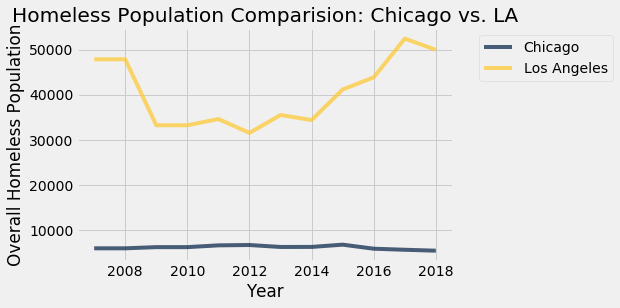

In [7]:
#changes in homeless populations in Chicago and LA relative to time
LaChiComparision=pit_table.where("CoC Name", make_array("Los Angeles City & County CoC", "Chicago CoC")).select("CoC Name", "Overall Homeless", "Year").pivot("CoC Name", "Year","Overall Homeless", sum).relabeled("Chicago CoC", "CHI Overall Homeless Population").relabeled("Los Angeles City & County CoC", "LA Overall Homeless Population")
LaChiComparision.relabeled("CHI Overall Homeless Population", "Chicago").relabeled("LA Overall Homeless Population", "Los Angeles").plot("Year")
plots.ylabel("Overall Homeless Population")
plots.title("Homeless Population Comparision: Chicago vs. LA")


Text(0, 0.5, 'Rate of Homelessness')

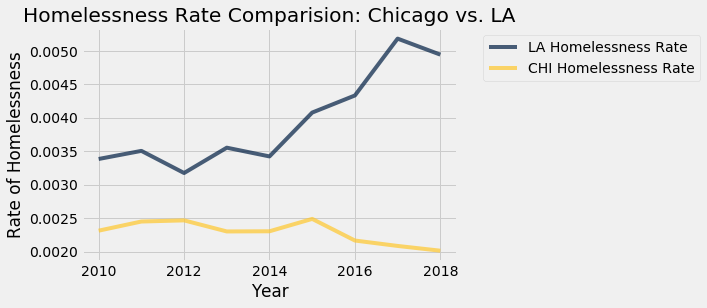

In [8]:
LaChiTotal=LaChiComparision.join("Year", LaChiPop, "Year")
LaChiTotal=LaChiTotal.with_columns("LA Homelessness Rate", LaChiTotal.column("LA Overall Homeless Population")/LaChiTotal.column("LAPOP"), "CHI Homelessness Rate", LaChiTotal.column("CHI Overall Homeless Population")/LaChiTotal.column("CHIPOP"))
LaChiTotal.plot("Year", make_array("LA Homelessness Rate", "CHI Homelessness Rate"))
plots.title("Homelessness Rate Comparision: Chicago vs. LA")
plots.ylabel("Rate of Homelessness")

# Spatial Patterns##

In [9]:
states=make_array()
state_rate=pit_table.with_column("States", pit_table.apply(stripstates, "CoC Number")).group("States", sum).drop("CoC Name sum", "CoC Number sum", "Year sum")
state_rate

States,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum
AK,22671,19426,3245,15298,12667,2631,7373,6759,614,2398,2201,197,2884,2123,761
AL,58290,40536,17754,43603,29190,14413,14687,11346,3341,5150,3920,1230,9382,4186,5196
AR,37293,20356,16937,29342,14997,14345,7951,5359,2592,2837,1848,989,6332,2513,3819
AZ,136844,87024,49820,90004,44604,45400,46840,42420,4420,14204,12932,1272,21353,6611,14742
CA,1495789,546658,949131,1201635,327746,873889,294154,218912,75242,95144,70854,24290,388875,62819,326056
CO,153688,89344,64344,75320,44910,30410,78368,44434,33934,22844,13606,9238,19350,7692,11658
CT,50906,42963,7943,33636,26149,7487,17270,16814,456,5887,5706,181,9026,5883,3143
DC,82269,76549,5720,46006,40286,5720,36263,36263,0,11395,11395,0,21463,17109,4354
DE,12095,11388,707,7936,7263,673,4159,4125,34,1376,1364,12,1383,1154,229
FL,545317,236943,308374,365350,149403,215947,179967,87540,92427,62541,28574,33967,88831,25035,63796


In [10]:
full_state=stateregions.join("State Code", state_rate.join("States", statepops, "State Code"), "States").relabeled("Geographic Area", "State")
full_state=full_state.with_column("2007-2018 Population", full_state.column("2007 Population")+full_state.column("2008 Population")+full_state.column("2009 Population")+full_state.column("2010 Population")+full_state.column("2011 Population")+full_state.column("2012 Population")+full_state.column("2013 Population")+full_state.column("2014 Population")+full_state.column("2015 Population")+full_state.column("2016 Population")+full_state.column("2017 Population")+full_state.column("2018 Population"))
full_state

State Code,Region,Division,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,State,2007 Population,2008 Population,2009 Population,2010 Population,2011 Population,2012 Population,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population,2018 Population,2007-2018 Population
AK,West,Pacific,22671,19426,3245,15298,12667,2631,7373,6759,614,2398,2201,197,2884,2123,761,Alaska,680300,687455,698895,713906,722038,730399,737045,736307,737547,741504,739786,737438,8662620
AL,South,East South Central,58290,40536,17754,43603,29190,14413,14687,11346,3341,5150,3920,1230,9382,4186,5196,Alabama,4672840,4718206,4757938,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,57702667
AR,South,West South Central,37293,20356,16937,29342,14997,14345,7951,5359,2592,2837,1848,989,6332,2513,3819,Arkansas,2848650,2874554,2896843,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,35347455
AZ,West,Mountain,136844,87024,49820,90004,44604,45400,46840,42420,4420,14204,12932,1272,21353,6611,14742,Arizona,6167681,6280362,6343154,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,79597506
CA,West,Pacific,1495789,546658,949131,1201635,327746,873889,294154,218912,75242,95144,70854,24290,388875,62819,326056,California,36250311,36604337,36961229,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,456764011
CO,West,Mountain,153688,89344,64344,75320,44910,30410,78368,44434,33934,22844,13606,9238,19350,7692,11658,Colorado,4803868,4889730,4972195,5048281,5121771,5193721,5270482,5351218,5452107,5540921,5615902,5695564,62955760
CT,Northeast,New England,50906,42963,7943,33636,26149,7487,17270,16814,456,5887,5706,181,9026,5883,3143,Connecticut,3527270,3545579,3561807,3579125,3588023,3594395,3594915,3594783,3587509,3578674,3573880,3572665,42898625
DC,South,South Atlantic,82269,76549,5720,46006,40286,5720,36263,36263,0,11395,11395,0,21463,17109,4354,District of Columbia,574404,580236,592228,605085,619602,634725,650431,662513,675254,686575,695691,702455,7679199
DE,South,South Atlantic,12095,11388,707,7936,7263,673,4159,4125,34,1376,1364,12,1383,1154,229,Delaware,871749,883874,891730,899595,907316,915188,923638,932596,941413,949216,957078,967171,11040564
FL,South,South Atlantic,545317,236943,308374,365350,149403,215947,179967,87540,92427,62541,28574,33967,88831,25035,63796,Florida,18367842,18527305,18652644,18845785,19093352,19326230,19563166,19860330,20224249,20629982,20976812,21299325,235367022


In [11]:
full_state_rate=full_state.with_columns("Rate of Homelessness", full_state.column("Overall Homeless sum")/full_state.column("2007-2018 Population"),"Rate of Shelter", full_state.column("Sheltered Total Homeless sum")/full_state.column("Overall Homeless sum"))
full_state_rate

State Code,Region,Division,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,State,2007 Population,2008 Population,2009 Population,2010 Population,2011 Population,2012 Population,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population,2018 Population,2007-2018 Population,Rate of Homelessness,Rate of Shelter
AK,West,Pacific,22671,19426,3245,15298,12667,2631,7373,6759,614,2398,2201,197,2884,2123,761,Alaska,680300,687455,698895,713906,722038,730399,737045,736307,737547,741504,739786,737438,8662620,0.00261711,0.856866
AL,South,East South Central,58290,40536,17754,43603,29190,14413,14687,11346,3341,5150,3920,1230,9382,4186,5196,Alabama,4672840,4718206,4757938,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,57702667,0.00101018,0.695419
AR,South,West South Central,37293,20356,16937,29342,14997,14345,7951,5359,2592,2837,1848,989,6332,2513,3819,Arkansas,2848650,2874554,2896843,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,35347455,0.00105504,0.54584
AZ,West,Mountain,136844,87024,49820,90004,44604,45400,46840,42420,4420,14204,12932,1272,21353,6611,14742,Arizona,6167681,6280362,6343154,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,79597506,0.0017192,0.635936
CA,West,Pacific,1495789,546658,949131,1201635,327746,873889,294154,218912,75242,95144,70854,24290,388875,62819,326056,California,36250311,36604337,36961229,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,456764011,0.00327475,0.365465
CO,West,Mountain,153688,89344,64344,75320,44910,30410,78368,44434,33934,22844,13606,9238,19350,7692,11658,Colorado,4803868,4889730,4972195,5048281,5121771,5193721,5270482,5351218,5452107,5540921,5615902,5695564,62955760,0.00244121,0.581334
CT,Northeast,New England,50906,42963,7943,33636,26149,7487,17270,16814,456,5887,5706,181,9026,5883,3143,Connecticut,3527270,3545579,3561807,3579125,3588023,3594395,3594915,3594783,3587509,3578674,3573880,3572665,42898625,0.00118666,0.843967
DC,South,South Atlantic,82269,76549,5720,46006,40286,5720,36263,36263,0,11395,11395,0,21463,17109,4354,District of Columbia,574404,580236,592228,605085,619602,634725,650431,662513,675254,686575,695691,702455,7679199,0.0107132,0.930472
DE,South,South Atlantic,12095,11388,707,7936,7263,673,4159,4125,34,1376,1364,12,1383,1154,229,Delaware,871749,883874,891730,899595,907316,915188,923638,932596,941413,949216,957078,967171,11040564,0.00109551,0.941546
FL,South,South Atlantic,545317,236943,308374,365350,149403,215947,179967,87540,92427,62541,28574,33967,88831,25035,63796,Florida,18367842,18527305,18652644,18845785,19093352,19326230,19563166,19860330,20224249,20629982,20976812,21299325,235367022,0.00231688,0.434505


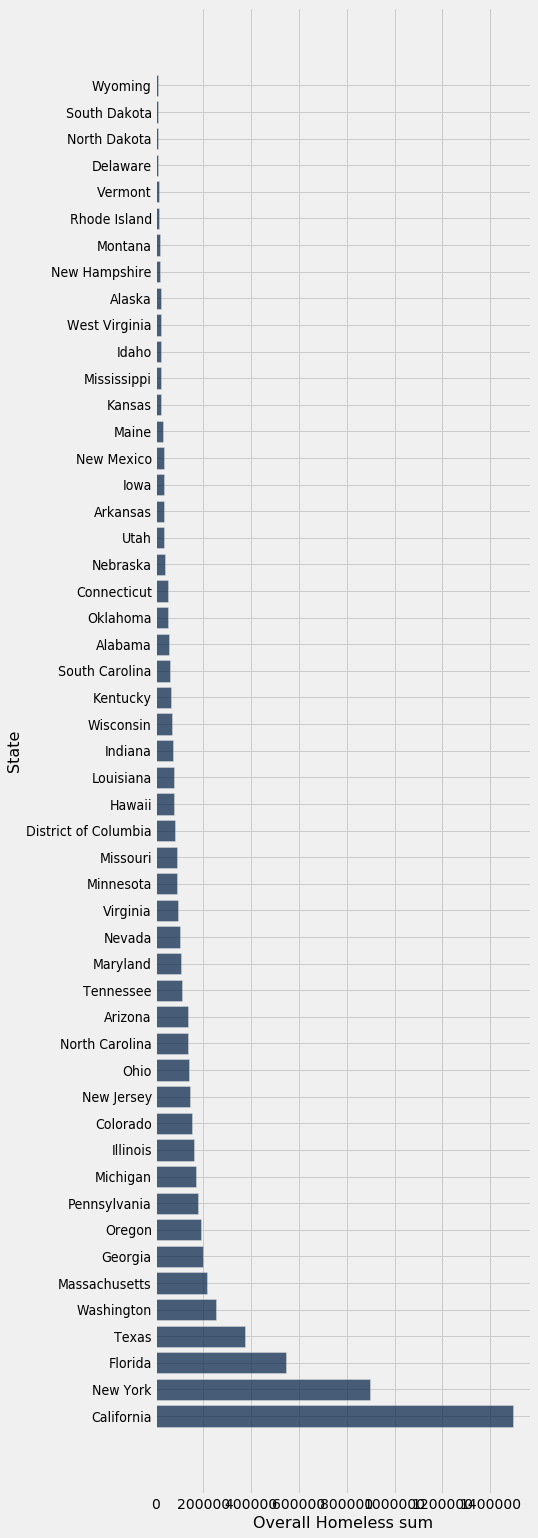

In [12]:
full_state_rate.sort("Overall Homeless sum").barh("State", "Overall Homeless sum")

Text(0.5, 1.0, 'Rate of Homelessness by State')

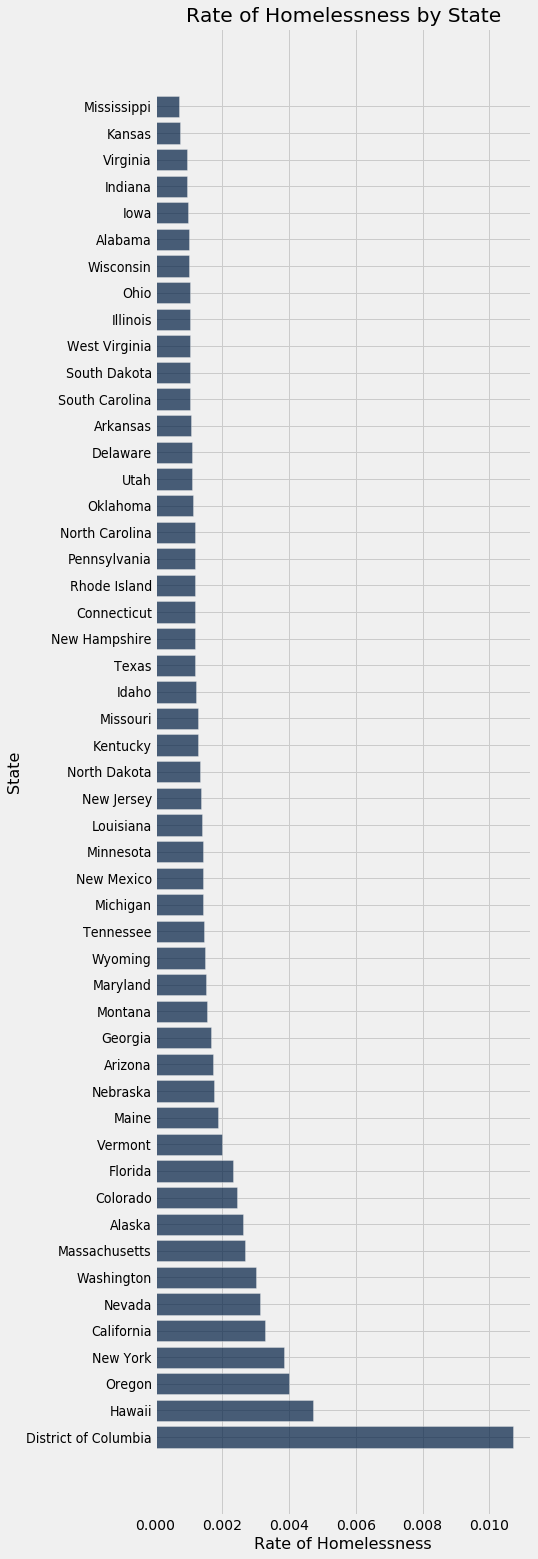

In [13]:
full_state_rate.sort("Rate of Homelessness").barh("State", "Rate of Homelessness")
plots.title("Rate of Homelessness by State")

Text(0.5, 1.0, 'Rate of Shelter by State')

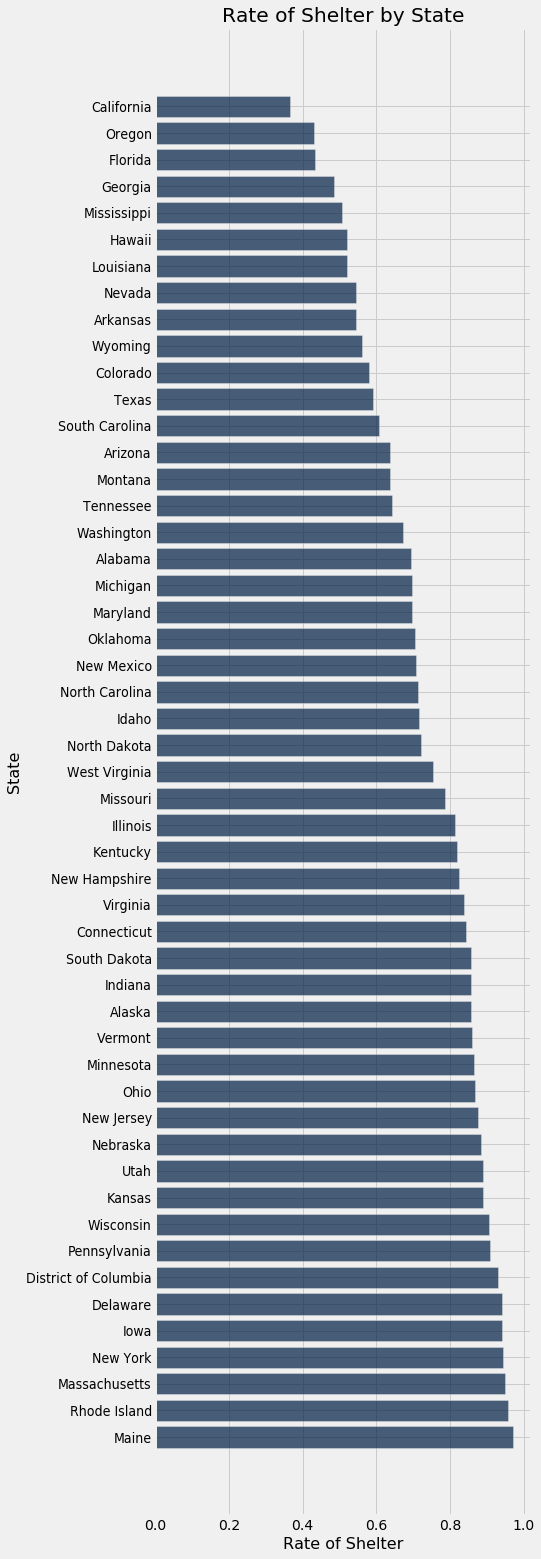

In [14]:
full_state_rate.sort("Rate of Shelter").barh("State", "Rate of Shelter")
plots.title("Rate of Shelter by State")

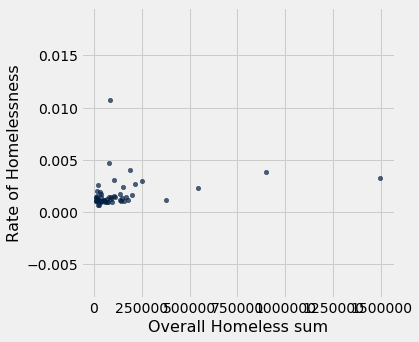

In [15]:
full_state_rate.scatter("Overall Homeless sum", "Rate of Homelessness")

In [16]:
full_region_rate=full_state.group("Division", sum)
full_region_rate=full_region_rate.with_columns("Rate of Homelessness", full_region_rate.column("Overall Homeless sum sum")/full_region_rate.column("2007-2018 Population sum"),"Rate of Shelter", full_region_rate.column("Sheltered Total Homeless sum sum")/full_region_rate.column("Overall Homeless sum sum")).drop("State Code sum", "Region sum", "state sum")
full_region_rate

Division,Overall Homeless sum sum,Sheltered Total Homeless sum sum,Unsheltered Homeless sum sum,Homeless Individuals sum sum,Sheltered Total Homeless Individuals sum sum,Unsheltered Homeless Individuals sum sum,Homeless People in Families sum sum,Sheltered Total Homeless People in Families sum sum,Unsheltered Homeless People in Families sum sum,Homeless Family Households sum sum,Sheltered Total Homeless Family Households sum sum,Unsheltered Homeless Family Households sum sum,Chronically Homeless Individuals sum sum,Sheltered Total Chronically Homeless Individuals sum sum,Unsheltered Chronically Homeless Individuals sum sum,State sum,2007 Population sum,2008 Population sum,2009 Population sum,2010 Population sum,2011 Population sum,2012 Population sum,2013 Population sum,2014 Population sum,2015 Population sum,2016 Population sum,2017 Population sum,2018 Population sum,2007-2018 Population sum,Rate of Homelessness,Rate of Shelter
East North Central,617125,499731,117394,366364,276559,89805,250761,223172,27589,80274,72210,8064,71385,45373,26012,,46187992,46275120,46355854,46438539,46513075,46586913,46693513,46768031,46784467,46820090,46878905,46931883,559234382,0.00110352,0.809773
East South Central,263266,180683,82583,187380,122859,64521,75886,57824,18062,25381,19248,6133,45094,21478,23616,,18033589,18203301,18339805,18459485,18544202,18636993,18717506,18788413,18858660,18936283,19027451,19112813,223658501,0.00117709,0.686313
Middle Atlantic,1223117,1138554,84563,547858,468694,79164,675259,669860,5399,213467,211709,1758,87390,46420,40970,,40374157,40535811,40729526,40910862,41070880,41186859,41263026,41312211,41318039,41299643,41269709,41257789,492528512,0.00248334,0.930863
Mountain,520980,326749,194231,334251,188090,146161,186729,138659,48070,56362,42900,13462,70935,27325,43610,,21165124,21554191,21858509,22124419,22350951,22611397,22880389,23167729,23494771,23849630,24184624,24552385,273794119,0.00190282,0.627181
New England,344375,318627,25748,158495,135461,23034,185880,183166,2714,62797,61800,997,39126,29248,9878,,14279205,14340115,14403575,14469783,14529652,14589870,14644797,14703653,14729548,14759146,14802967,14853290,175105601,0.00196667,0.925233
Pacific,2037990,857976,1180014,1530849,480153,1050696,507141,377823,129318,161351,120416,40935,474295,91517,382778,,48430290,48954984,49482867,49979206,50436496,50878080,51312136,51792853,52293634,52764820,53135362,53441278,612902006,0.00332515,0.420991
South Atlantic,1261900,727603,534297,837780,446106,391674,424120,281497,142623,141457,91616,49841,204892,90145,114747,,57964590,58693474,59300986,59938760,60545558,61172939,61748943,62401885,63138979,63932017,64641801,65322408,738802340,0.00170803,0.576593
West North Central,305889,259901,45988,165190,131804,33386,140699,128097,12602,45532,41637,3895,38388,27337,11051,,20105697,20248815,20392583,20536210,20639556,20750024,20870622,20984207,21084672,21176827,21277130,21376861,249443204,0.00122629,0.849658
West South Central,543523,319810,223713,378257,192322,185935,165266,127488,37778,53890,41071,12819,102348,35136,67212,,34690563,35288155,35907824,36468821,36949639,37461143,37926795,38467439,39039903,39532886,39929172,40318727,451981067,0.00120253,0.588402


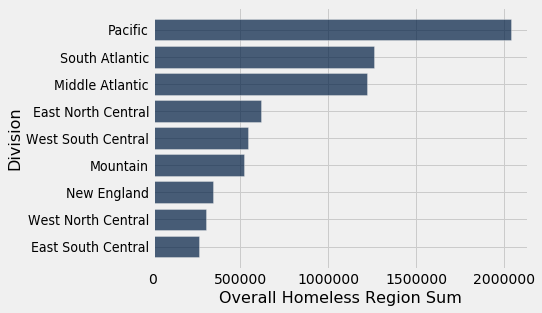

In [17]:
full_region_rate.relabeled("Overall Homeless sum sum", "Overall Homeless Region Sum").sort("Overall Homeless Region Sum", descending=True).barh("Division", "Overall Homeless Region Sum")

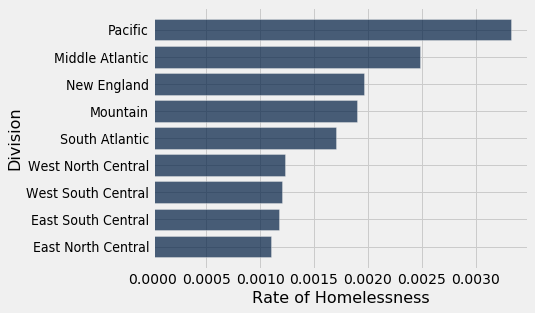

In [18]:
full_region_rate.sort("Rate of Homelessness", descending=True).barh("Division", "Rate of Homelessness")

Text(0.5, 1.0, 'Rate of Shelter by Region')

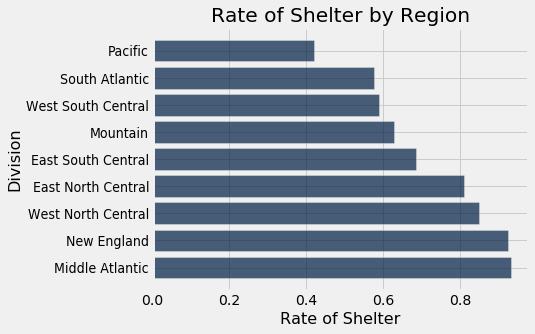

In [19]:
full_region_rate.sort("Rate of Shelter", descending=False).barh("Division", "Rate of Shelter")
plots.title("Rate of Shelter by Region")

Text(0.5, 1.0, 'Overall Homeless Population over Time by Region ')

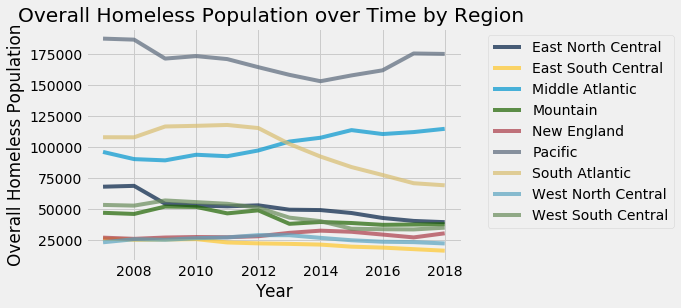

In [20]:
temporalspatial=stateregions.join("State Code", stateabbreviations.join("code", pit_table.with_column("States", pit_table.apply(stripstates, "CoC Number")), "States"), "code")
temporalspatial.pivot("Division", "Year", "Overall Homeless", sum).plot("Year")
plots.ylabel("Overall Homeless Population")
plots.title("Overall Homeless Population over Time by Region ")

In [21]:
pop_temporalspatial=full_state_rate.group("Division", sum).select("Division", 19,20,21,22,23,24,25,26,27,28,29,30).relabeled(make_array('2007 Population sum', '2008 Population sum','2009 Population sum', '2010 Population sum', '2011 Population sum', '2012 Population sum', '2013 Population sum', '2014 Population sum', '2015 Population sum', '2016 Population sum', '2017 Population sum', '2018 Population sum'),make_array('2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'))
pop_temporalspatial=turn(pop_temporalspatial).relabel("-", "Year")
pop_temporalspatial

Year,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
2007,46187992,18033589,40374157,21165124,14279205,48430290,57964590,20105697,34690563
2008,46275120,18203301,40535811,21554191,14340115,48954984,58693474,20248815,35288155
2009,46355854,18339805,40729526,21858509,14403575,49482867,59300986,20392583,35907824
2010,46438539,18459485,40910862,22124419,14469783,49979206,59938760,20536210,36468821
2011,46513075,18544202,41070880,22350951,14529652,50436496,60545558,20639556,36949639
2012,46586913,18636993,41186859,22611397,14589870,50878080,61172939,20750024,37461143
2013,46693513,18717506,41263026,22880389,14644797,51312136,61748943,20870622,37926795
2014,46768031,18788413,41312211,23167729,14703653,51792853,62401885,20984207,38467439
2015,46784467,18858660,41318039,23494771,14729548,52293634,63138979,21084672,39039903
2016,46820090,18936283,41299643,23849630,14759146,52764820,63932017,21176827,39532886


In [22]:
homeless_temporalspatial=temporalspatial.pivot("Division", "Year", "Overall Homeless", sum)    

Text(0.5, 1.0, 'Rates of Homelessness over Time by Region ')

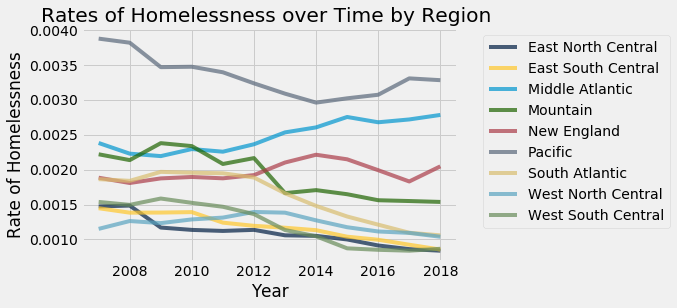

In [23]:
rateofhomelessness_temporalspatial=homeless_temporalspatial.select("Year")
for i in pop_temporalspatial.drop("Year").labels:
    rateofhomelessness_temporalspatial=rateofhomelessness_temporalspatial.with_column(i,homeless_temporalspatial.column(i)/pop_temporalspatial.column(i))
rateofhomelessness_temporalspatial.plot("Year")
plots.ylabel("Rate of Homelessness")
plots.title("Rates of Homelessness over Time by Region ")

# Bed Inventory Patterns##

In [24]:
beds_table

Year,CoC Number,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
2018,AK-500,1028,749,0,279
2018,NY-512,150,110,0,40
2018,NY-510,40,21,0,19
2018,NY-508,1055,695,16,344
2018,NY-507,227,178,0,49
2018,NY-505,759,557,0,202
2018,NY-504,50,50,0,0
2018,NY-503,456,304,0,152
2018,NY-501,147,79,0,68
2018,NY-500,700,555,12,133


In [25]:
bed_state_rate=beds_table.with_column("CoC Number", beds_table.apply(stripstates, "CoC Number")).relabeled("CoC Number", "States")
bed_state_rate

Year,States,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
2018,AK,1028,749,0,279
2018,NY,150,110,0,40
2018,NY,40,21,0,19
2018,NY,1055,695,16,344
2018,NY,227,178,0,49
2018,NY,759,557,0,202
2018,NY,50,50,0,0
2018,NY,456,304,0,152
2018,NY,147,79,0,68
2018,NY,700,555,12,133


In [26]:
beds_by_state=bed_state_rate.where("Year",are.above(2007))
beds_by_state_full=stateregions.join("State Code", beds_by_state, "States")
beds_by_state_full

State Code,Region,Division,Year,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),Total Year-Round Beds (SH),Total Year-Round Beds (TH)
AK,West,Pacific,2018,1028,749,0,279
AK,West,Pacific,2018,912,649,0,263
AK,West,Pacific,2017,1023,597,0,426
AK,West,Pacific,2017,805,533,0,272
AK,West,Pacific,2016,819,542,0,277
AK,West,Pacific,2016,1007,553,0,454
AK,West,Pacific,2015,841,581,0,260
AK,West,Pacific,2015,1019,603,0,416
AK,West,Pacific,2014,826,583,0,243
AK,West,Pacific,2014,988,606,0,382


Text(0.5, 1.0, 'Cumulative Number of Beds Over Time')

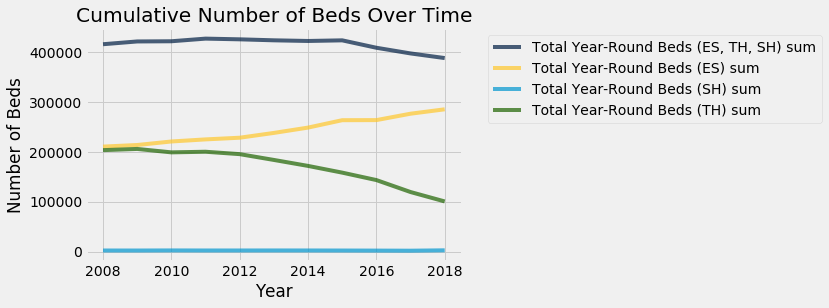

In [27]:
beds_by_state_full.group("Year", sum).drop("State Code sum", "Region sum", "Division sum").plot("Year")
plots.ylabel("Number of Beds")
plots.title("Cumulative Number of Beds Over Time")

Text(0.5, 1.0, 'Number of Beds By Region Over Time')

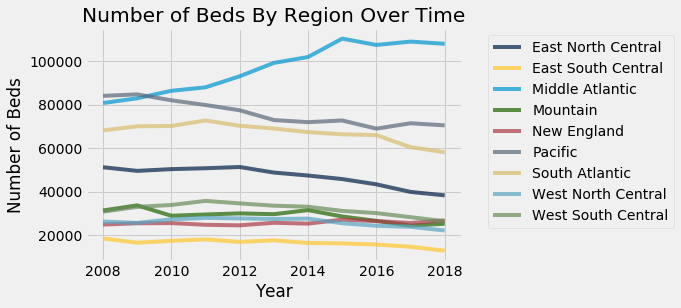

In [28]:
beds_by_state_full.pivot("Division", "Year", "Total Year-Round Beds (ES, TH, SH)", sum).plot("Year")
plots.ylabel("Number of Beds")
plots.title("Number of Beds By Region Over Time")

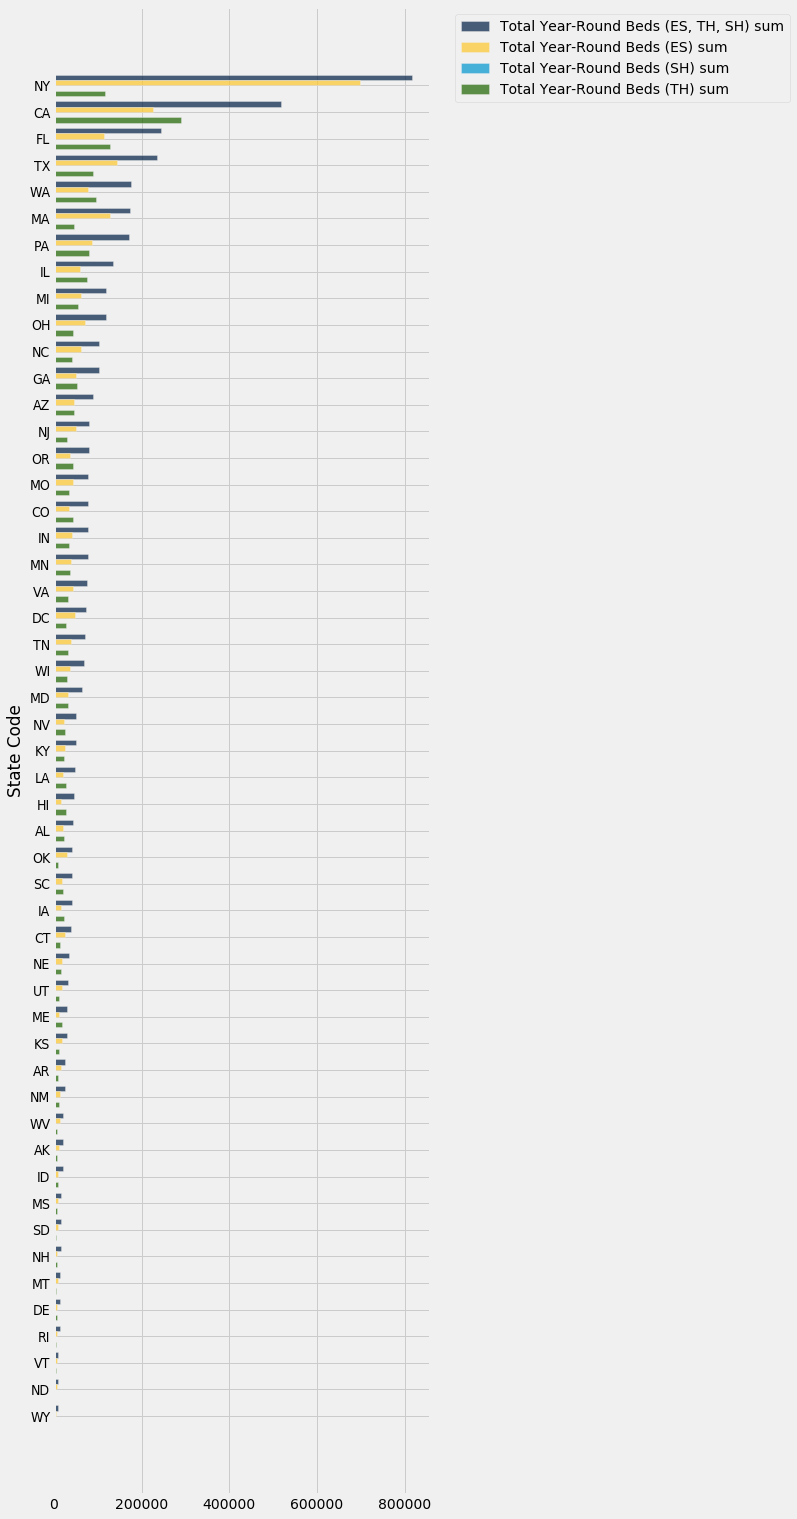

In [29]:
beds_by_state=beds_by_state_full.group('State Code', sum)
beds_by_state.sort("Total Year-Round Beds (ES, TH, SH) sum", descending=True).barh("State Code", make_array(4,5,6,7))

In [30]:
beds_by_region=beds_by_state_full.group("Division", sum).drop("State Code sum", "Region sum", "state sum", "population sum")
beds_by_region

Division,Year sum,"Total Year-Round Beds (ES, TH, SH) sum",Total Year-Round Beds (ES) sum,Total Year-Round Beds (SH) sum,Total Year-Round Beds (TH) sum
East North Central,1266151,516870,272173,3967,240730
East South Central,531432,180432,93807,654,85971
Middle Atlantic,1417008,1.06778e+06,835753,4330,227693
Mountain,398574,319223,161818,1582,155823
New England,722450,281893,187539,1003,93351
Pacific,1336624,837061,369616,3248,464197
South Atlantic,2045126,739217,389467,4135,345615
West North Central,708508,285374,153656,845,130873
West South Central,817170,350429,210977,2447,137005


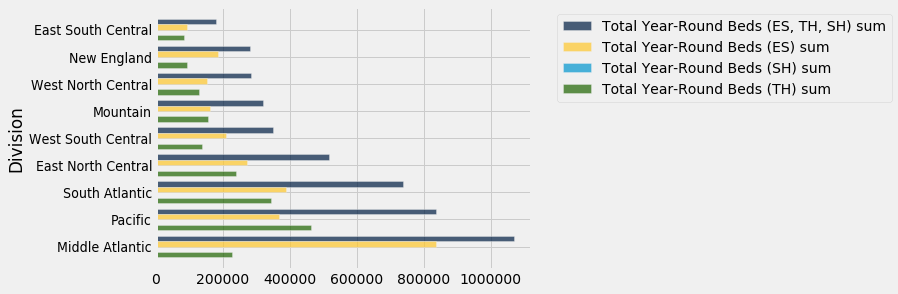

In [31]:
beds_by_region.drop("Year sum").sort("Total Year-Round Beds (ES, TH, SH) sum").barh("Division")

# Homeless and Bed Patterns##

In [32]:
#Removed year 2007, as it contained NaNs, and doing so retained the integrity of the data more than selectively retaining rows that didn't have NaNs.
joinable_beds_table=beds_table.where("Year",are.above(2007)).group("CoC Number", sum).drop("Year sum")
joinable_pit_table=pit_table.where("Year",are.above(2007)).group("CoC Number", sum).drop("Year sum", "CoC Name sum")
pitbed=joinable_pit_table.join("CoC Number", joinable_beds_table, "CoC Number")
pitbed

CoC Number,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,"Total Year-Round Beds (ES, TH, SH) sum",Total Year-Round Beds (ES) sum,Total Year-Round Beds (SH) sum,Total Year-Round Beds (TH) sum
AK-500,12571,11230,1341,8825,7588,1237,3746,3642,104,1165,1131,34,1387,1033,354,10903,6468,0,4435
AK-501,8458,6809,1649,5411,4188,1223,3047,2621,426,1043,905,138,1219,869,350,9275,6441,0,2834
AL-500,17479,10791,6688,12955,7582,5373,4524,3209,1315,1637,1101,536,4016,1535,2481,12265,4495,374,7396
AL-501,6955,4096,2859,4938,2313,2625,2017,1783,234,685,614,71,807,223,584,4687,2957,0,1730
AL-502,2561,2228,333,1845,1601,244,716,627,89,246,219,27,202,112,90,2806,619,0,2187
AL-503,6247,4977,1270,4878,3727,1151,1369,1250,119,445,407,38,1780,1151,629,6311,4703,0,1608
AL-504,4744,3602,1142,3752,2702,1050,992,900,92,318,288,30,690,249,441,4444,1786,0,2658
AL-505,3609,2720,889,2781,2116,665,828,604,224,313,229,84,254,128,126,2746,1805,0,941
AL-506,2278,1692,586,1706,1359,347,572,333,239,178,107,71,265,148,117,2407,650,3,1754
AL-507,8965,6634,2331,6564,4967,1597,2401,1667,734,862,608,254,375,157,218,7281,3491,0,3790


In [33]:
pitbed_state_rate=pitbed.with_column("CoC Number", pitbed.apply(stripstates, "CoC Number")).relabeled("CoC Number", "States")
pitbed_state_rate

States,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,"Total Year-Round Beds (ES, TH, SH) sum",Total Year-Round Beds (ES) sum,Total Year-Round Beds (SH) sum,Total Year-Round Beds (TH) sum
AK,12571,11230,1341,8825,7588,1237,3746,3642,104,1165,1131,34,1387,1033,354,10903,6468,0,4435
AK,8458,6809,1649,5411,4188,1223,3047,2621,426,1043,905,138,1219,869,350,9275,6441,0,2834
AL,17479,10791,6688,12955,7582,5373,4524,3209,1315,1637,1101,536,4016,1535,2481,12265,4495,374,7396
AL,6955,4096,2859,4938,2313,2625,2017,1783,234,685,614,71,807,223,584,4687,2957,0,1730
AL,2561,2228,333,1845,1601,244,716,627,89,246,219,27,202,112,90,2806,619,0,2187
AL,6247,4977,1270,4878,3727,1151,1369,1250,119,445,407,38,1780,1151,629,6311,4703,0,1608
AL,4744,3602,1142,3752,2702,1050,992,900,92,318,288,30,690,249,441,4444,1786,0,2658
AL,3609,2720,889,2781,2116,665,828,604,224,313,229,84,254,128,126,2746,1805,0,941
AL,2278,1692,586,1706,1359,347,572,333,239,178,107,71,265,148,117,2407,650,3,1754
AL,8965,6634,2331,6564,4967,1597,2401,1667,734,862,608,254,375,157,218,7281,3491,0,3790


In [34]:
pitbed_full_state=stateregions.join("State Code", pitbed_state_rate, "States").drop("population").group("State Code", sum).drop("Region sum", "Division sum")
pitbed_full_state

State Code,Overall Homeless sum sum,Sheltered Total Homeless sum sum,Unsheltered Homeless sum sum,Homeless Individuals sum sum,Sheltered Total Homeless Individuals sum sum,Unsheltered Homeless Individuals sum sum,Homeless People in Families sum sum,Sheltered Total Homeless People in Families sum sum,Unsheltered Homeless People in Families sum sum,Homeless Family Households sum sum,Sheltered Total Homeless Family Households sum sum,Unsheltered Homeless Family Households sum sum,Chronically Homeless Individuals sum sum,Sheltered Total Chronically Homeless Individuals sum sum,Unsheltered Chronically Homeless Individuals sum sum,"Total Year-Round Beds (ES, TH, SH) sum sum",Total Year-Round Beds (ES) sum sum,Total Year-Round Beds (SH) sum sum,Total Year-Round Beds (TH) sum sum
AK,21029,18039,2990,14236,11776,2460,6793,6263,530,2208,2036,172,2606,1902,704,20178,12909,0,7269
AL,52838,36740,16098,39419,26367,13052,13419,10373,3046,4684,3573,1111,8389,3703,4686,42947,20506,377,22064
AR,33457,18071,15386,26355,13231,13124,7102,4840,2262,2513,1664,849,5480,2104,3376,25389,16222,0,9167
AZ,122198,78406,43792,79984,40181,39803,42214,38225,3989,12745,11641,1104,18549,5961,12588,90403,44920,433,45050
CA,1356803,498147,858656,1090683,297249,793434,266120,200898,65222,86411,65059,21352,348534,56869,291665,510214,224573,2061,283580
CO,139463,82373,57090,68476,41856,26620,70987,40517,30470,20140,12174,7966,17300,7288,10012,78116,35074,317,42725
CT,46424,39292,7132,30463,23693,6770,15961,15599,362,5445,5302,143,8003,5287,2716,23952,16620,0,7332
DC,76949,71569,5380,42289,36909,5380,34660,34660,0,10888,10888,0,19703,15670,4033,74390,47418,75,26897
DE,11034,10534,500,7220,6733,487,3814,3801,13,1257,1253,4,1233,1078,155,13148,6148,65,6935
FL,497248,216414,280834,332310,136631,195679,164938,79783,85155,56923,25791,31132,81368,23193,58175,243198,113945,1792,127461


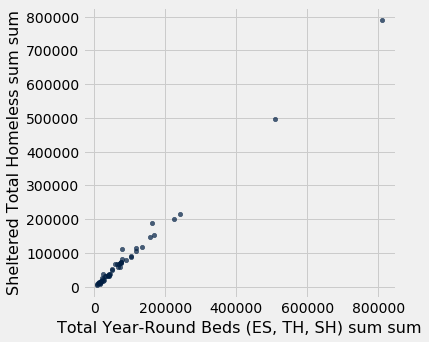

In [35]:
pitbed_full_state.scatter("Total Year-Round Beds (ES, TH, SH) sum sum", "Sheltered Total Homeless sum sum")

Text(0.5, 1.0, 'Sheltered Homeless vs. Total Beds')

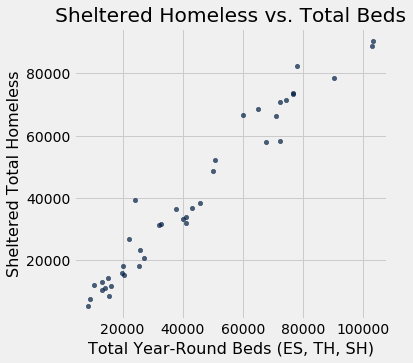

In [36]:
pitbed_full_state.where("Sheltered Total Homeless sum sum", are.below(100000)).scatter("Total Year-Round Beds (ES, TH, SH) sum sum", "Sheltered Total Homeless sum sum")
plots.xlabel("Total Year-Round Beds (ES, TH, SH)")
plots.ylabel("Sheltered Total Homeless")
plots.title("Sheltered Homeless vs. Total Beds")

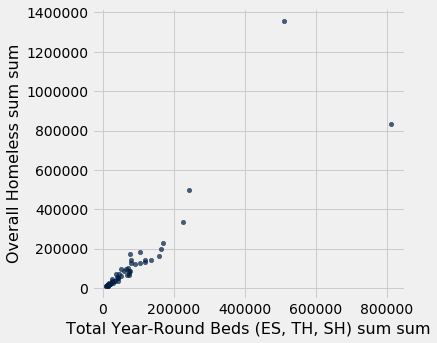

In [37]:
pitbed_full_state.scatter("Total Year-Round Beds (ES, TH, SH) sum sum", "Overall Homeless sum sum")

Text(0.5, 1.0, 'Overall Homeless vs. Total Beds')

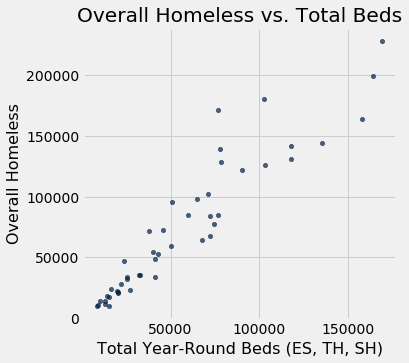

In [38]:
pitbed_full_state.where("Overall Homeless sum sum", are.below(300000)).scatter("Total Year-Round Beds (ES, TH, SH) sum sum", "Overall Homeless sum sum")
plots.xlabel("Total Year-Round Beds (ES, TH, SH)")
plots.ylabel("Overall Homeless")
plots.title("Overall Homeless vs. Total Beds")

In [39]:
#Perform a similar comparision but temporal instead of spatial

In [40]:
years_joinable_pit_table=pit_table.group("Year", sum).where("Year",are.above(2007)).drop("CoC Number sum", "CoC Name sum")
years_joinable_beds_table=beds_table.where("Year",are.above(2007)).where("CoC Number", are.not_equal_to("Total")).group("Year", sum)
years_pitbed=years_joinable_pit_table.join("Year",years_joinable_beds_table,"Year")
years_pitbed

Year,Overall Homeless sum,Sheltered Total Homeless sum,Unsheltered Homeless sum,Homeless Individuals sum,Sheltered Total Homeless Individuals sum,Unsheltered Homeless Individuals sum,Homeless People in Families sum,Sheltered Total Homeless People in Families sum,Unsheltered Homeless People in Families sum,Homeless Family Households sum,Sheltered Total Homeless Family Households sum,Unsheltered Homeless Family Households sum,Chronically Homeless Individuals sum,Sheltered Total Chronically Homeless Individuals sum,Unsheltered Chronically Homeless Individuals sum,CoC Number sum,"Total Year-Round Beds (ES, TH, SH) sum",Total Year-Round Beds (ES) sum,Total Year-Round Beds (SH) sum,Total Year-Round Beds (TH) sum
2008,639784,386361,253423,404525,204855,199670,235259,181506,53753,75750,58649,17101,120115,45418,74697,,418318,211222,2034,205062
2009,630227,403308,226919,392131,215995,176136,238096,187313,50783,78514,60843,17671,107212,45592,61620,,424042,214425,2028,207589
2010,637077,403543,233534,395140,212218,182922,241937,191325,50612,79442,62305,17137,106062,43329,62733,,424432,221610,2199,200623
2011,623788,392316,231472,387613,205834,181779,236175,186482,49693,77184,61636,15548,103522,38971,64551,,429835,225840,2116,201879
2012,621553,390155,231398,382156,199159,182997,239397,190996,48401,77155,61796,15359,96268,32647,63621,,428527,229206,2129,197192
2013,590364,394698,195666,368174,203127,165047,222190,191571,30619,70957,60855,10102,86289,29418,56871,,426231,238708,2191,185332
2014,576450,401051,175399,360189,209148,151041,216261,191903,24358,67613,59629,7984,83989,31203,52786,,424880,249497,2159,173224
2015,564708,391440,173268,358422,205616,152806,206286,185824,20462,64197,58064,6133,83170,28355,54815,,426267,264440,2043,159784
2016,549928,373571,176357,355212,198008,157204,194716,175563,19153,61265,55265,6000,77486,24596,52890,,411285,264629,1907,144749
2017,550996,360867,190129,366585,193144,173441,184411,167723,16688,57886,52829,5057,86705,26629,60076,,399439,277537,1653,120249


Text(0.5, 1.0, 'Homeless Individuals and Beds Over Time')

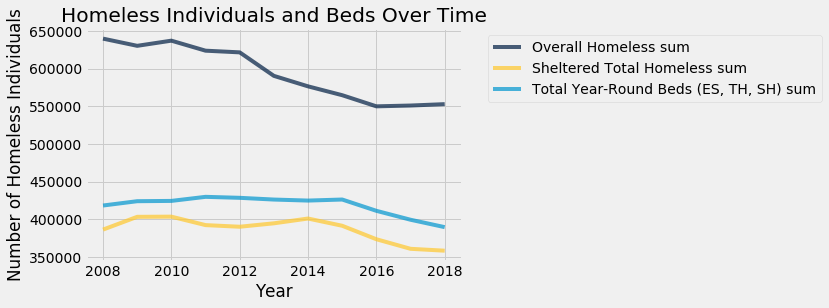

In [41]:
years_pitbed.plot("Year", make_array("Overall Homeless sum", "Sheltered Total Homeless sum","Total Year-Round Beds (ES, TH, SH) sum"))
plots.ylabel("Number of Homeless Individuals")
plots.title("Homeless Individuals and Beds Over Time")

# Solutions to Homelessness##

In [42]:
top10cities=make_array('New York', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia', 'Phoenix', 'San Antonio', 'San Diego', 'Dallas', 'San Jose')
top10coc=make_array('New York City CoC', 'Los Angeles City & County CoC', 'Chicago CoC', 'Houston, Pasadena, Conroe/Harris, Ft. Bend, Montgomery, Counties CoC', 'Philadelphia CoC', 'Phoenix, Mesa/Maricopa County CoC', 'San Antonio/Bexar County CoC', 'San Diego City and County CoC', 'Dallas City & County, Irving CoC', 'San Jose/Santa Clara City & County CoC')
top10coc_table=pit_table.where("CoC Name", are.contained_in(top10coc)).pivot("CoC Name", "Year", "Overall Homeless", sum).relabeled(top10coc,top10cities)

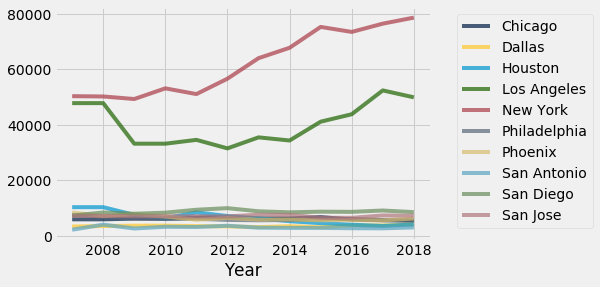

In [43]:
top10coc_table.plot("Year")

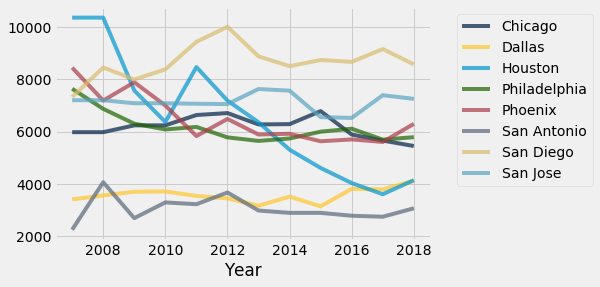

In [44]:
top10coc_table.drop("New York", "Los Angeles").plot("Year")

In [45]:
turned_citypops=turn(citypops).relabel("-", "Year")

In [46]:
top10coc_table

Year,Chicago,Dallas,Houston,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Jose
2007,5979,3408,10363,47862,50372,7640,8448,2247,7326,7202
2008,5979,3558,10363,47862,50261,6871,7189,4063,8455,7202
2009,6240,3701,7576,33243,49343,6304,7889,2690,7995,7086
2010,6240,3710,6368,33243,53187,6084,6999,3291,8383,7086
2011,6635,3540,8471,34622,51123,6180,5831,3222,9436,7067
2012,6710,3447,7187,31553,56672,5780,6485,3670,10013,7053
2013,6276,3163,6359,35524,64060,5645,5889,2980,8879,7631
2014,6287,3514,5308,34393,67810,5738,5918,2892,8506,7567
2015,6786,3141,4609,41174,75323,5998,5631,2891,8742,6556
2016,5889,3810,4031,43854,73523,6112,5702,2781,8669,6524


Text(0.5, 1.0, 'Rate of Homelessness Over Time by Major City')

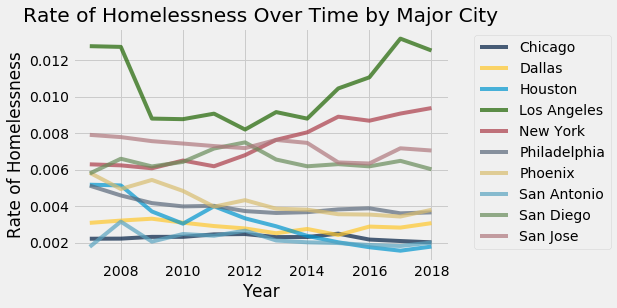

In [47]:
rateofhomelessness_top10coc=top10coc_table.select("Year")
for i in top10coc_table.drop("Year").labels:
    rateofhomelessness_top10coc=rateofhomelessness_top10coc.with_column(i,top10coc_table.column(i)/turned_citypops.column(i))
rateofhomelessness_top10coc.plot("Year")
plots.ylabel("Rate of Homelessness")
plots.title("Rate of Homelessness Over Time by Major City")

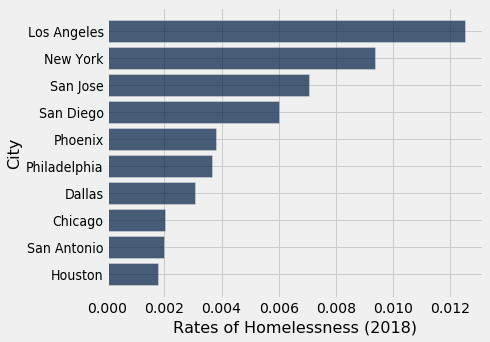

In [48]:
comp_rateofhomelessness_top10coc=turn(rateofhomelessness_top10coc.where("Year",2018).with_column("Year","Rates of Homelessness (2018)")).relabeled("-","City")
comp_rateofhomelessness_top10coc.sort(1, descending=True).barh("City")

Text(0.5, 1.0, 'Median Home Price vs. 2018 Rate of Homelessness')

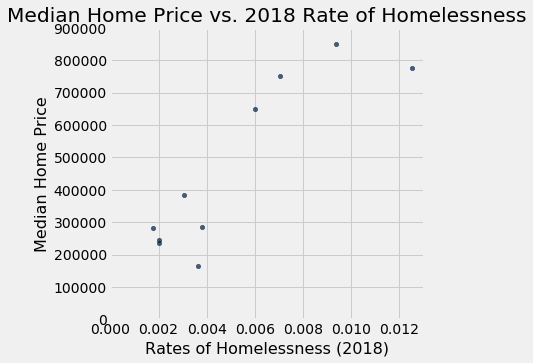

In [49]:
comp_rateofhomelessness_top10coc.join("City", medianhouses, "City").sort("Median Home Price", descending=True).scatter(1,2)
plots.axis((0,0.013,0,900000))
plots.title("Median Home Price vs. 2018 Rate of Homelessness")